In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

df=pd.read_excel('data_for_exam.xlsx')
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,2014-03-12,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382.0,Referral,Closed with explanation,Yes,No
1,2017-01-19,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,2014-06-08,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854.0,Web,Closed with explanation,Yes,Yes
4,2014-09-13,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233.0,Web,Closed with explanation,Yes,Yes


Question #1: Data Wrangling

In [ ]:
df.shape

(99, 12)

In [ ]:
df.isnull().sum()

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        23
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64

In [ ]:
df['Sub-product'].fillna('Other mortage',inplace=True)

Replacing all null values with most frequemtly occuring values in Non numerical columns

In [ ]:
df['Consumer disputed?'].fillna('No',inplace=True)

In [ ]:
df['Consumer disputed?'].value_counts()

No     80
Yes    19
Name: Consumer disputed?, dtype: int64

In [ ]:
df['Consumer disputed?'].isnull().sum()

0

In [ ]:
df['Sub-product'].fillna('None')

0                                 Other mortgage
1                 Federal student loan servicing
2     General-purpose credit card or charge card
3                                  Other mortage
4                                    Credit card
                         ...                    
94                  Domestic (US) money transfer
95        Conventional adjustable mortgage (ARM)
96                      Mobile or digital wallet
97                                 Other mortage
98                                   Payday loan
Name: Sub-product, Length: 99, dtype: object

In [ ]:
df['State'].value_counts()

CA    15
FL     9
TX     8
GA     6
MD     5
NY     5
NC     4
MI     4
MN     3
VA     3
SC     3
NV     2
LA     2
PA     2
IN     2
IL     2
CO     2
OH     2
WA     2
ME     2
RI     2
MA     1
HI     1
VT     1
MT     1
TN     1
AR     1
NJ     1
MS     1
OR     1
SD     1
WI     1
ID     1
DE     1
Name: State, dtype: int64

In [ ]:
df['State'].fillna('CA',inplace=True)

In [ ]:
df['ZIP code'].fillna(random.randint(0,95000),inplace=True)

In [ ]:
response='Satisfied Customer'

df['Company public response'].fillna('No Response needed',inplace=True)
df['Consumer complaint narrative'].fillna('Customer was satisfied',inplace=True)

In [ ]:
df.isnull().sum()   #No null values remaining

Date received                   0
Product                         0
Sub-product                     0
Consumer complaint narrative    0
Company public response         0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
Company response to consumer    0
Timely response?                0
Consumer disputed?              0
dtype: int64

In [ ]:
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,2014-03-12,Mortgage,Other mortgage,Customer was satisfied,No Response needed,M&T BANK CORPORATION,MI,48382.0,Referral,Closed with explanation,Yes,No
1,2017-01-19,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,No Response needed,"Navient Solutions, LLC.",LA,30804.0,Web,Closed with explanation,Yes,No
2,2018-04-06,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,No Response needed,CAPITAL ONE FINANCIAL CORPORATION,VA,30804.0,Web,Closed with explanation,Yes,No
3,2014-06-08,Credit card,Other mortage,Customer was satisfied,No Response needed,AMERICAN EXPRESS COMPANY,ID,83854.0,Web,Closed with explanation,Yes,Yes
4,2014-09-13,Debt collection,Credit card,Customer was satisfied,No Response needed,"CITIBANK, N.A.",VA,23233.0,Web,Closed with explanation,Yes,Yes


Question # 3c. It has been performed here due to the fact that the values have bene transformed later onwards

In [ ]:
Respond=['satisfied']
pos=['satisfied']

words=['fraud','victim','but']
Customer=df[['Consumer complaint narrative','Consumer disputed?']]
for i in Customer['Consumer complaint narrative']:
  if Respond[0] in i:
    Respond+='Customer was satisfied'
  for word in words:
    if word in i:
      Respond='Customer was not satisfied. They complained'

AttributeError: ignored

Question : 2

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Product']=le.fit_transform(df['Product'])
df['Sub-product']=le.fit_transform(df['Sub-product'])
df['Consumer complaint narrative']=le.fit_transform(df['Consumer complaint narrative'])
df['Company public response']=le.fit_transform(df['Company public response'])
df['Company']=le.fit_transform(df['Company'])
df['State']=le.fit_transform(df['State'])
df['Submitted via']=le.fit_transform(df['Submitted via'])
df['Timely response?']=le. fit_transform(df['Timely response?'])
df['Consumer disputed?']=le.fit_transform(df['Consumer disputed?'])

<Axes: ylabel='Frequency'>

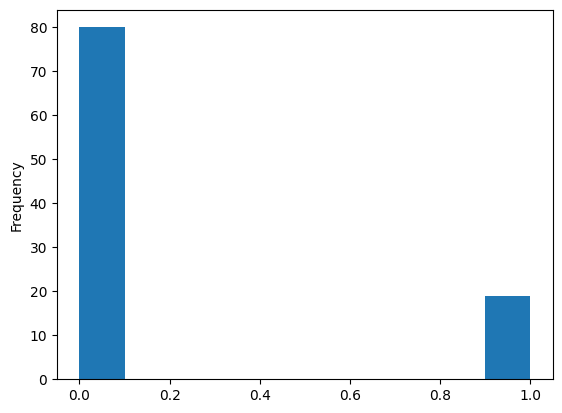

In [ ]:
df['Consumer disputed?'].plot(kind='hist')

<Axes: ylabel='Frequency'>

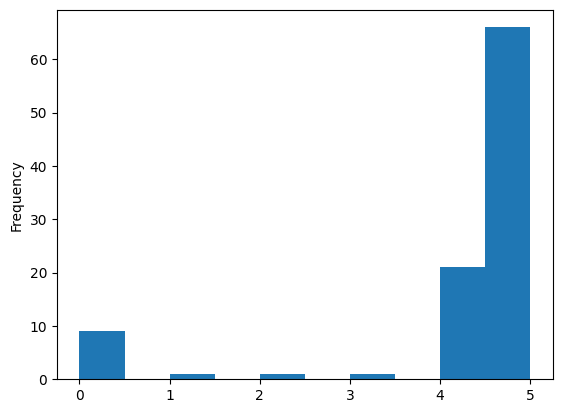

In [ ]:
df['Company public response'].plot(kind='hist')

Business problems

Problem # 1: The Company needs to improve the Customer Helpline service. They should be fair and understand their problems. Most complaints happened because they behaved rudely or frauded the customer

Problem # 2: Most of the complaints were made when requests were made using online means. Eg, Websites. Requests through referrals and other means have a good track record

Problem #3: Most complainers didn't register their Zip Codes. It's possible that they are frauds as well. If Not,They should be registered to create a better solution for the problem

Machine Learning Algorithms like KNN, Logistic Regression and Decision Treees can be used to find hidden insights and discover how to improve Customer dispution




**Question # 3**

In [ ]:
from sklearn.model_selection import train_test_split

x=df.drop(['Date received','Company response to consumer','Consumer disputed?'],axis=1)
y=df['Consumer disputed?']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((74, 9), (25, 9), (74,), (25,))

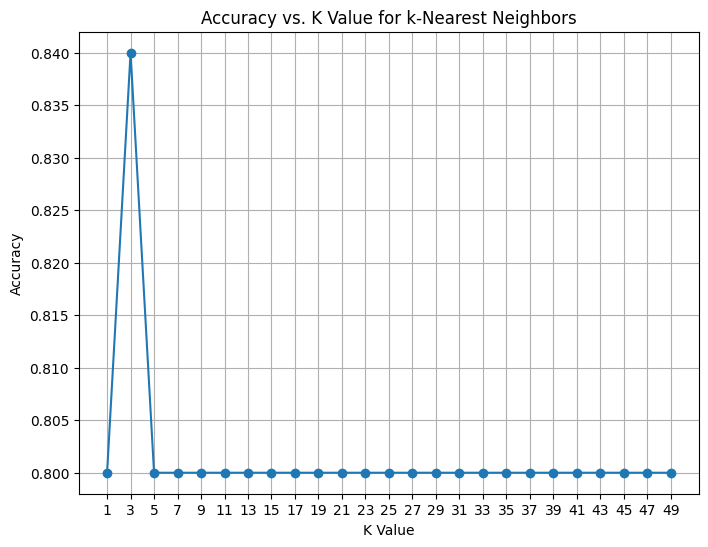

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(x_train,y_train)
knn.predict(x_test)    # I won't be calculating accuracy cuz our graphs says that it's 84 % accurate at k=3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0])

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

Lr=LogisticRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classifier

In [ ]:
from sklearn.metrics import jaccard_score

jaccard_score(y_pred,y_test)   # This indicates that our model wasn;t good fit on our data. Incase we get more training data, the score may increase

0.0

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(max_depth=4,criterion='entropy')
dtree.fit(x_train,y_train)
y_hat=dtree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_hat,y_test)

0.76

This evaluates that our KNN Model was the most accurate in predicting Customer dispute rate